In [32]:
# 인공신경망 퍼셉트론 실습

import numpy as np

def sigmoid(x):                   # 활성화 함수
  return 1 / (1 + np.exp(-x))

import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
x = 1       # 입력
y = 0       # 출력
w = tf.random.normal([1], 0, 1)
output = sigmoid(x * w)

print('처음 : ' , w.numpy(),  output)

처음 :  [0.15601091] [0.5389238]


In [6]:
for i in range(1000):
  output = sigmoid(x * w) 
  error = y - output          # y (기대 출력값) - output (실제출력값) = 에러
  w = w + x * 0.1 * error     # 가중치 w 조정 ( w + 학습률(0.1) * x * error)    # 학습률의 의미는 빠르게 학습할 것이냐 천천히 학습할 것이냐? (= 보폭) (경사하강법을 이용..)
                                                                                # 학습률이 높다고 정확하진 않다. 산에서 빠르게 내려올수록 놓치는것이많다.                                                    
  if i % 100 == 99:
    print(i, w.numpy(), error, output)      # 점점 0 에 가까워 진다.

99 [-5.3259783] [-0.00484238] [0.00484238]
199 [-5.3732605] [-0.00461968] [0.00461968]
299 [-5.4184155] [-0.00441653] [0.00441653]
399 [-5.4616284] [-0.00423046] [0.00423046]
499 [-5.503057] [-0.00405941] [0.00405941]
599 [-5.542843] [-0.00390163] [0.00390163]
699 [-5.581112] [-0.00375563] [0.00375563]
799 [-5.6179757] [-0.00362015] [0.00362015]
899 [-5.653533] [-0.00349409] [0.00349409]
999 [-5.687872] [-0.0033765] [0.0033765]


In [11]:
## 뉴런 실습 x=0, y=1 편향 사용 소스

x = 0
y = 1
w = tf.random.normal([1], 0, 1) # 가중치
b = tf.random.normal([1], 0, 1) # 편향

for i in range(1000):
  output = sigmoid(x * w + 1 * b)
  error = y - output

  w = w + x * 0.1 * error
  b = b + 1 * 0.1 * error

  if i % 100 == 99:
    print(i, error, output)

99 [0.07229638] [0.9277036]
199 [0.04290885] [0.95709115]
299 [0.03033721] [0.9696628]
399 [0.02341402] [0.976586]
499 [0.01904434] [0.98095566]
599 [0.01604038] [0.9839596]
699 [0.01385009] [0.9861499]
799 [0.01218361] [0.9878164]
899 [0.01087326] [0.98912674]
999 [0.00981635] [0.99018365]


In [27]:
# 논리 게이트 AND OR XOR 신경망 구현

## AND 게이트 구현  

### 뉴런 구조 - 입력 2개, 편향과 출력 1개씩 / 구할 값 ; 가중치 2개와 편향 1개  

x = np.array([[1,1], [1, 0], [0, 1], [0, 0]])
y = np.array([[1], [0], [0], [0]])

w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)

b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(x[j]*w) + b_x * b)
    error = y[j][0] - output

    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 199:
    print(i, error_sum)

for i in range(4):
  print('x: ', x[i], 'y: ', y[i], 'output: ', sigmoid(np.sum(x[i]*w)+b))

199 [-0.1166389]
399 [-0.06787825]
599 [-0.04777719]
799 [-0.0367517]
999 [-0.02980365]
1199 [-0.02503495]
1399 [-0.02156497]
1599 [-0.01893087]
1799 [-0.01686145]
1999 [-0.01519664]
x:  [1 1] y:  [1] output:  [0.9645216]
x:  [1 0] y:  [0] output:  [0.02513924]
x:  [0 1] y:  [0] output:  [0.02521686]
x:  [0 0] y:  [0] output:  [2.45377e-05]


In [28]:
## OR 게이트 구현 소스 

x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[1], [1], [1], [1]])

w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)

b_x = 1

for i in range(2000):

  error_sum = 0

  for j in range(4):

    output = sigmoid(np.sum(x[j]*w)+ b_x * b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 199:
    print(i, error_sum)

for i in range(4):
  print('x : ', x[i], 'y : ', y[i], 'output : ', sigmoid(np.sum(x[i]*w)+b))

199 [0.03698987]
399 [0.01937789]
599 [0.01325613]
799 [0.01011646]
999 [0.00819814]
1199 [0.00690103]
1399 [0.00596422]
1599 [0.00525481]
1799 [0.00469881]
1999 [0.00425076]
x :  [1 1] y :  [1] output :  [0.999795]
x :  [1 0] y :  [1] output :  [0.99887866]
x :  [0 1] y :  [1] output :  [0.9995478]
x :  [0 0] y :  [1] output :  [0.9975292]


## Sequential 모델과 딥러닝 구조  

### 입력, 은닉, 출력 층 

- 파라미터 수 ; (입력측 뉴런 수 + 1) * (출력측 뉴런 수)   // 시험 문제

In [30]:
## xor 게이트 구현 소스

x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')                             
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')    # lr : learning rate (학습률) ; AND 나 OR 게이트 에서는 0.1로 설정
model.summary()                                                         # mse : 평균 제곱 오차 ; 기대출력에서 실제 출력을 뺀 뒤에 제곱한 값을 평균하는 것

# tf.keras를 이용한 XOR 네트워크 학습
history = model.fit(x, y, epochs=2000, batch_size=1)          # 위에 소스를 2천번 돌린다.(epochs)

# tf.keras 를 이용한 XOR 네트워크 학습
print(model.predict(x))


# XOR 네트워크의 가중치와 편향 확인  
for w in model.weights:
  print(w)


#  [[0.12890734]
#  [0.9044267 ]
#  [0.9053032 ]
#  [0.07570972]]
# <tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
# array([[-3.2744954, -5.528577 ],
#        [-3.3057773, -5.7936816]], dtype=float32)>   # [[-3.2744954, -5.528577 ],[-3.3057773, -5.7936816]] : 처음 가중치
# <tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([4.7296233, 1.8998569], dtype=float32)> # [4.7296233, 1.8998569] : 첫 편향치
# <tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
# array([[ 6.4276266],
#        [-7.0016356]], dtype=float32)>               # [[ 6.4276266], [-7.0016356]]  : 마지막 가중치
# <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-2.7829385], dtype=float32)> # [-2.7829385] : 마지막 편향치(출력하기 전)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2707
Epoch 2/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2689
Epoch 3/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2671
Epoch 4/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2666
Epoch 5/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2666
Epoch 6/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2662
Epoch 7/2000
4/4 [==============================] 

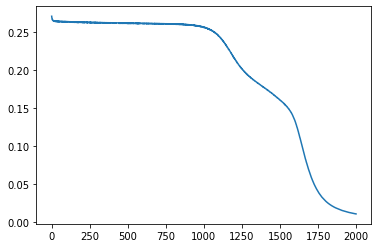

In [36]:
## XOR 모델의 학습 과정 시각화  

plt.plot(history.history['loss'])

## 초매개변수와 학습률 

- 초매개변수(hyperparameter)

  - 딥러닝에서 우리가 설정하는 값  

    모델 학습을 연속적으로 실행하는 중에 개발자 본인에 의해 조작되는 '손잡이'

  - 예를 들어 학습률은 초매개변수 중 하나

    매개 변수와 대비되는 개념

  > 쪽지시험 출제예상

# 활성화 함수 그리기


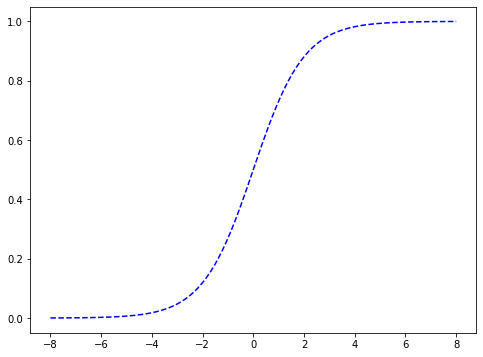

In [41]:
## 시그모이드 함수  

### S자 곡선 - (0, 1) 사이의 값  


def sigm_func(x):
  return 1 / (1 + np.exp(-x))


## 시그모이드 함수 그리기 
plt.figure(figsize=(8, 6))
x = np.linspace(-8, 8, 100)
plt.plot(x, sigm_func(x), 'b--')

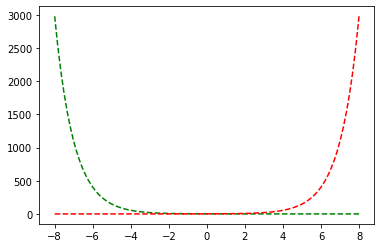

In [42]:
plt.plot(x, np.exp(-x), 'g--')
plt.plot(x, np.exp(x), 'r--')

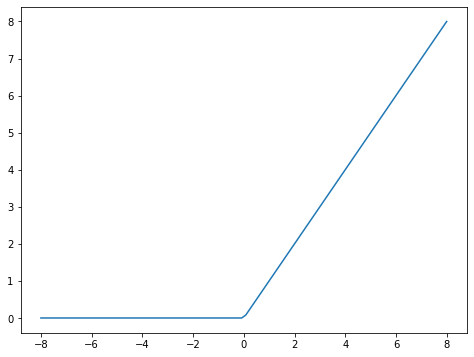

In [43]:
## ReLU 함수  

### x - 0, 음수면 0 ; 양수면 x  

def relu_func(x):
  return np.maximum(0, x)
  # return (x > 0)*x # same


## ReLU 함수 그리기
plt.figure(figsize=(8, 6))
x = np.linspace(-8, 8 , 100)
plt.plot(x, relu_func(x))


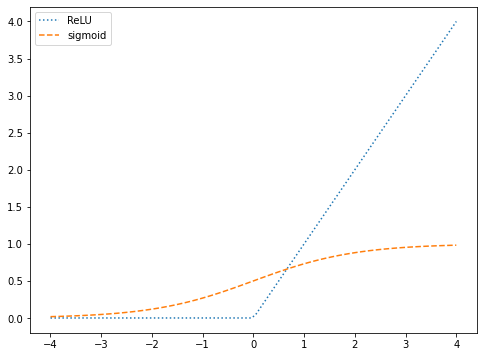

In [44]:
## 시그모이드 ReLU 함께 그리기  

plt.figure(figsize= (8, 6))

x = np.linspace(-4, 4, 100)
y = np.linspace(-0.2, 2, 100)

plt.plot(x, relu_func(x), linestyle=':', label="ReLU")
plt.plot(x, sigm_func(x), linestyle='--', label="sigmoid")
plt.legend(loc='upper left')

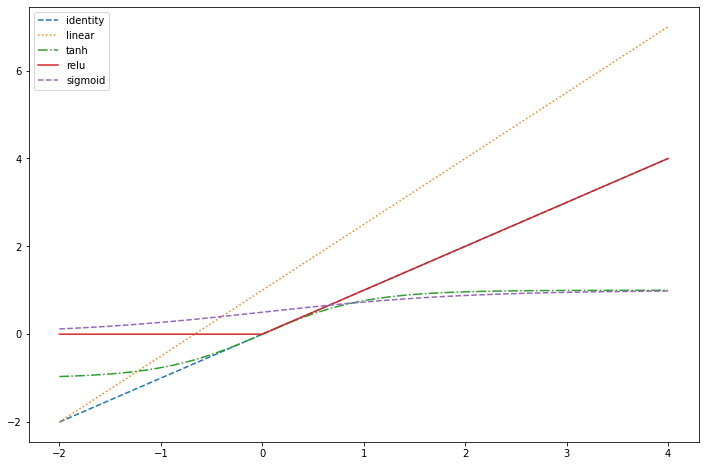

In [46]:
## 다양한 활성화 함수 그리기  

def identity_func(x):
  return x                # 항등 함수 y = x

def linear_func(x):
  return 1.5 * x + 1      # 1차 함수 ; a기울기(1.5), y절편 b(1) 조정가능  

def tanh_func(x):         # tanH 함수
  return np.tanh(x)


def relu_func(x):         # ReLU 함수
  return np.maximum(0, x)
  # return (x > 0) * x   와 같다  

def sigm_func(x):         # sigmoid 함수
  return 1 / (1 + np.exp(-x))

plt.figure(figsize=(12, 8))
x = np.linspace(-2, 4, 100)

plt.plot(x, identity_func(x), linestyle='--', label='identity')
plt.plot(x, linear_func(x), linestyle=':', label='linear')
plt.plot(x, tanh_func(x), linestyle='-.', label='tanh')
plt.plot(x, relu_func(x), linestyle='-', label='relu')
plt.plot(x, sigm_func(x), linestyle='--', label='sigmoid')
plt.legend(loc='upper left')

# 선형 회귀 ; y = 2x 예측

## 선형 회귀 문제  

- y = 2x 에 해당하는 값을 예측  

  - 훈련(학습) 데이터 ; x_train = [1, 2, 3, 4], y_train = [2, 4, 6, 8]  

  - 테스트 데이터 ; x_test = [1.2, 2.3, 3.4, 4.5], y_test = [2.4, 4.6, 6.8, 9.0]

  - 예측, 다음 x에 대해 예측되는 y를 출력 ; [3.5, 5, 5.5, 6]

  

## 선형 회귀 케라스 구현 (1)

- 하나의 Dense 층 

  입력은 1차원, 출력도 1차원  

- 활성화 함수 linear

  디폴트 값, 입력 뉴런과 가중치로 계산된 결과값이 그대로 출력으로  


```py
import tensorflow as tf

# 1 문제와 정답 데이터 지정
x_train = [1, 2, 3, 4]
y_train = [2, 4, 6, 8]

# 2 모델 구성 (생성)
model = tf.keras.models.Sequential([
                # 출력, 입력 = 여러 개 원소의 일차원 배열, 그대로 출력
  tf.keras.layers.Dense(1, input_shape(1,), activation = 'linear')
  # Dense(1, input_dim=1)

])
```


## 선형 회귀 케라스 구현(2)

- 확률적 경사 하강법 

  - optimizer='SGD'

    - 경사하강법의 계산량을 줄이기 위해 확률적 방법으로 경사하강법을 사용 ; 전체를 계산하지않고 확률적으로 일부 샘플로 계산  

- mae

  - 오차 평균 제곱합(Mean Squared Error, MSE)

    - 모든 예측과 정답과의 오차 제곱 합의 평균  

    


## 선형 회귀 모델 정보

```py
# 모델을 표시 (시각화)
model.summary()
```

## 선형 회귀 모델 학습(훈련)

- 히스토리 객체  

  - 매 에포크 마다의 훈련 손실값 (loss)
  - 매 에포크 마다의 훈련 정확도 (accuracy)
  - 매 에포크 마다의 검증 손실값 (val_loss)
  - 매 에포크 마다의 검증 정확도 (val_acc)

```py
# 4) 생성된 모델로 훈련 데이터 학습
# 훈련과정 정보를 history 객체에 저장

history = model.fit(x_train, y_train, epochs=500)
```

## 선형 회귀 모델 성능 평가 및 예측  

- 성능 평가  

```py
# 5) 테스트 데이터로 성능 평가
x_test = [1.2, 2.3, 3.4, 4.5]
y_test = [2.4, 4.6, 6.8, 9.0]

print('손실', model.evaluate(x_test, y_test))\
```

- 예측

```py
# x = [3.5, 5, 5.5, 6]의 예측
print(model.predict([3.5, 5, 5.5, 6]))

pred = model.predict([3.5, 5, 5.5, 6))

# 예측 값만 1차원으로
print(pred.fiatten())
print(pred.squeeze())
```

## 손실과 mae 시각화

```py
import matplotlib.pylab as plt

# 그래프 그리기
fig = plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')

#plt.plot(history.history['mse'], label='mse')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')
```

Text(0, 0.5, 'loss')

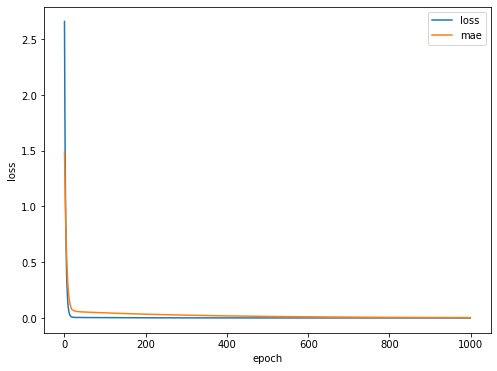

In [52]:
## 손실과 mae 시각화

# 그래프 그리기
fig = plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')

#plt.plot(history.history['mse'], label='mse')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')

## 예측 값 시각화

```py
import matplotlib.pylab as plt

x_test = [1.2, 2.3, 3.4, 4.5, 6.0]
y_test = [2.4, 4.6, 6.8, 9.0, 12.0]

# 그래프 그리기
fig = plt.figure(figsize=(8, 6))

plt.scatter(x_test, y_test, label='label')
plt.plot(x_test, y_test, 'y--')

x = [2.9, 3.5, 4.2, 5, 5.5, 6]

pred = model.predict(x)
plt.scatter(x, pred.flatten(), label='prediction')

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
```

Text(0, 0.5, 'y')

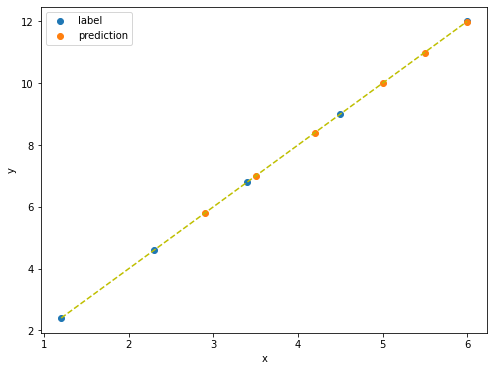

In [51]:
x_test = [1.2, 2.3, 3.4, 4.5, 6.0]
y_test = [2.4, 4.6, 6.8, 9.0, 12.0]
 
# 그래프 그리기
fig = plt.figure(figsize=(8, 6))
 
plt.scatter(x_test, y_test, label='label')
plt.plot(x_test, y_test, 'y--')
 
x = [2.9, 3.5, 4.2, 5, 5.5, 6]
 
pred = model.predict(x)
plt.scatter(x, pred.flatten(), label='prediction')
 
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')

In [48]:
## 전체 코드 

### 입출력 층만 존재  

# 버전 1.x만 가능  

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  

# 1) 문제와 정답 데이터 지정  
x_train = [1, 2, 3, 4]
y_train = [2, 4, 6, 8]

# 2) 모델 구성(생성)
model = Sequential([
  Dense(1, input_shape=(1, ), activation='linear')
  # Dense(1, input_dim=1)
])


# 3) 학습에 필요한 최적화 방법과 손실 함수 등 지정
# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력 정보를 선택  
# Mean Absolute Error, Mean Squared Error
model.compile(optimizer='SGD', loss='mse',
              metrics=['mae','mse'])

# 모델을 표시(시각화)
model.summary()

# 4) 생성된 모델로 훈련 데이터 학습 - 훈련데이터를 history에 저장
history = model.fit(x_train, y_train, epochs=1000)

# 5) 테스트 데이터로 성능 평가  
x_test = [1.2, 2.3, 3.4, 4.5]
y_test = [2.4, 4.6, 6.8, 9.0]
print('정확도: ', model.evaluate(x_test, y_test))

print(model.predict([3.5, 5, 5.5, 6]))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.6589 - mae: 1.4886 - mse: 2.6589
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.8466 - mae: 1.2355 - mse: 1.8466
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.2830 - mae: 1.0247 - mse: 1.2830
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8919 - mae: 0.8492 - mse: 0.8919
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6205 - mae: 0.7029 - mse: 0.6205
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4321 - mae: 0.5811 - mse: 0.4321
Epoch 7/1000

In [50]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'mse'])

# 선형 회귀 y = 2x + 1 예측

## 다음을 예측해 보세요

- x = [0, 1, 2, 3, 4]
- y = [1, 3, 5, ?, ?]

## 케라스로 예측

- 케라스와 numpy 사용  

- 학습에 3개 데이터  

  - x = [0, 1, 2, 3, 4] ; **x[:3]**
  - y = [1, 3, 5, ?, ?] ; **y[:3]**

- 예측

  - 뒤 2개 데이터 사용  
  - x = [0, 1, 2, 3, 4] ; **x[3:]**
  - y = [1, 3, 5, ?, ?] ; **y[3:]**

```py
import tensorflow as tf
import numpy as np

#훈련과 테스트 데이터
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 3, 5, 7, 9]) #y = x * 2 + 1

#인공신경망 모델 사용
model = tf.keras.models.Sequential()

#은닉계층 하나 추가
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

#모델의 패라미터를 지정하고 모델 구조를 생성
#최적화 알고리즘: 확률적 경사 하강법(SGD: Stochastic Gradient Descent)
#손실 함수(loss function): 평균제곱오차(MSE: Mean Square Error)
model.compile('SGD', 'mse')

#생성된 모델로 훈련 자료로 입력(x[:2])과 출력(y[:2])을 사용하여 학습
#키워드 매개변수 epoch(에퐄): 훈련반복횟수
#키워드 매개변수 verbose: 학습진행사항 표시
model.fit(x[:3], y[:3], epochs=1000, verbose=0)

#테스트 자료의 결과를 출력
print('Targets(정답):', y[3:])

#학습된 모델로 테스트 자료로 결과를 예측(model.predict)하여 출력
print('Predictions(예측):', model.predict(x[3:]).flatten())
```

In [53]:
# 훈련과 테스트 데이터
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 3, 5, 7, 9]) #y = x * 2 + 1
 
# 인공신경망 모델 사용
model = tf.keras.models.Sequential()
 
# 은닉계층 하나 추가
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))
 
# 모델의 패라미터를 지정하고 모델 구조를 생성
# 최적화 알고리즘: 확률적 경사 하강법(SGD: Stochastic Gradient Descent)
# 손실 함수(loss function): 평균제곱오차(MSE: Mean Square Error)
model.compile('SGD', 'mse')
 
# 생성된 모델로 훈련 자료로 입력(x[:2])과 출력(y[:2])을 사용하여 학습
# 키워드 매개변수 epoch(에퐄): 훈련반복횟수
# 키워드 매개변수 verbose: 학습진행사항 표시
model.fit(x[:3], y[:3], epochs=1000, verbose=0)
 
# 테스트 자료의 결과를 출력
print('Targets(정답):', y[3:])
 
# 학습된 모델로 테스트 자료로 결과를 예측(model.predict)하여 출력
print('Predictions(예측):', model.predict(x[3:]).flatten())

Targets(정답): [7 9]
Predictions(예측): [6.9980407 8.996826 ]


## 가장 간단히 입력층과 출력층을 구성 

- y[3:]의 2개 값을 맞추는 인공신경망  

  - 먼저 모델에서 W와 b를 구함  
  - 완전연결계층  

    - fully connected or dense layer

      - 입력 벡터에 가중치 벡터를 내적하고 편향값을 빼주는 연산  

```py
import tensorflow as tf
import numpy as np
#훈련과 테스트 데이터

x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 3, 5, 7, 9]) #y = x * 2 + 1

#인공신경망 모델 사용
model = tf.keras.models.Sequential()

#은닉계층 하나 추가
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

#모델의 패라미터를 지정한 후 학습
Model.compile(＇SGD＇, ＇mse＇)
Model.fit(x[:3], y[:3], epochs=1000, verbose=0)

print(＇Targets(정답):＇, y[3:])
print('Predictions(예측):', model.predict(x[3:]).flatten())
```

In [57]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 3, 5, 7, 9]) #y = x * 2 + 1
 
# 인공신경망 모델 사용
model = tf.keras.models.Sequential()
 
# 은닉계층 하나 추가
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))
 
# 모델의 패라미터를 지정한 후 학습
model.compile('SGD', 'mse')
model.fit(x[:3], y[:3], epochs=1000, verbose=0)
 
print('Targets(정답):', y[3:])
print('Predictions(예측):', model.predict(x[3:]).flatten())

Targets(정답): [7 9]
Predictions(예측): [7.000301 9.000487]


## 케라스로 예측 순서

- 1. 케라스 패키지 임포트

  ```py
  import tensorflow as tf
  import numpy as np
  ```

- 2. 데이터 지정 

  ```py
  x = numpy.array([0, 1, 2, 3, 4])
  y = numpy.array([1, 3, 5, 7, 9])   # y = x*2 + 1
  ```

- 3. 인공신경망 모델 구성

  ```py
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(출력수, input_shape=(입력수,)))
  ```

- 4. 최적화 방법과 손실 함수 지정해 인공 신경망 모델 생성  

  ```py
  model.compile('SGD', 'mse')
  ```

- 5. 생성된 모델로 훈련 데이터 학습  

  ```py
  model.fit(...)
  ```

- 6. 성능 평가  

  ```py
  model.evaluate(...)
  ```

- 7. 테스트 데이터로 결과 예측  

  ```py
  model.predict(...)
  ```

In [59]:
## 전 소스  

# 훈련과 테스트 데이터
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 3, 5, 7, 9])   # y = 2 * x + 1

# 인공신경망 모델 사용
model = tf.keras.models.Sequential()

# 은닉계층 하나 추가
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

# 모델의 파라미터를 지정하고 모델 구조를 생성
# 최적화 알고리즘: 확률적 경사 하강법 (SGD : Stochastic Gradient Descent)
# 손실 함수 (loss function) : 평균 제곱 오차 (MSE : Mean Square Error)
model.compile('SGD', 'mse')

# 생성된 모델로 훈련 자료로 입력 (x[:2]) 과 출력 (y[:2])을 사용하여 학습  
# 키워드 매개변수 epochs(에퐄): 훈련반복횟수
# 키워드 매개변수 verbose: 학습진행사항 표시  
model.fit(x[:3], y[:3], epochs=1000, verbose=0)

# 테스트 자료의 결과를 출력  
print('Targets (정답) : ', y[3:])

# 학습된 모델로 테스트 자료로 결과를 예측 (model.predict) 하여 출력 
print('Predictions (예측) : ', model.predict(x[3:]).flatten())

Targets (정답) :  [7 9]
Predictions (예측) :  [6.9978733 8.996554 ]
